In [197]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
df = pd.read_csv('adult.data', delimiter=',' ,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.shape

(32561, 15)

In [27]:
df2 = pd.read_csv('adult.test',delimiter=',',header=None)
df2.shape

(16281, 15)

In [28]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [89]:
master_df = pd.concat([df,df2],0)
master_df.columns = ['age','workclass','fnl_wgt','education','edu_num','marital',
                    'occupation','relationship','race','gender','cap_gain','cap_loss','hours/week','country','target']

In [90]:
master_df.head(25)

,age,workclass,fnl_wgt,education,edu_num,marital,occupation,relationship,race,gender,cap_gain,cap_loss,hours/week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [91]:
## Missing values
round(100*(master_df.isnull().mean()),2)

age             0.0
workclass       0.0
fnl_wgt         0.0
education       0.0
edu_num         0.0
marital         0.0
occupation      0.0
relationship    0.0
race            0.0
gender          0.0
cap_gain        0.0
cap_loss        0.0
hours/week      0.0
country         0.0
target          0.0
dtype: float64

In [92]:
## Datatypes
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           48842 non-null  int64 
 1   workclass     48842 non-null  object
 2   fnl_wgt       48842 non-null  int64 
 3   education     48842 non-null  object
 4   edu_num       48842 non-null  int64 
 5   marital       48842 non-null  object
 6   occupation    48842 non-null  object
 7   relationship  48842 non-null  object
 8   race          48842 non-null  object
 9   gender        48842 non-null  object
 10  cap_gain      48842 non-null  int64 
 11  cap_loss      48842 non-null  int64 
 12  hours/week    48842 non-null  int64 
 13  country       48842 non-null  object
 14  target        48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [93]:
## Mapping Target Variable appropriately
master_df['target'] = master_df.target.apply(lambda x:0 if x==" <=50K" else 1)
## Less than 50k are marked as 0s and the other ones as 1s

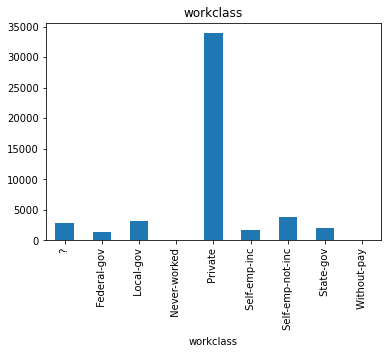

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


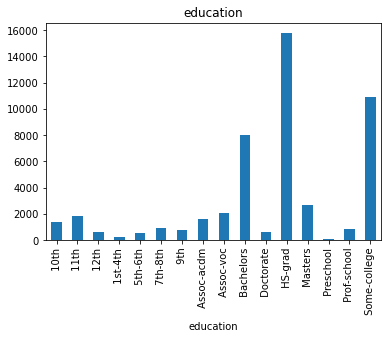

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


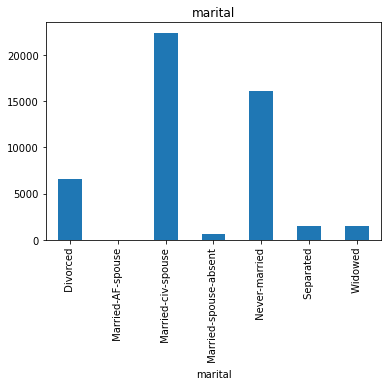

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


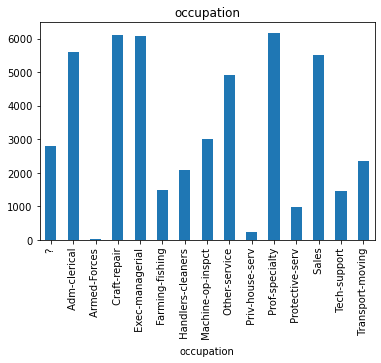

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


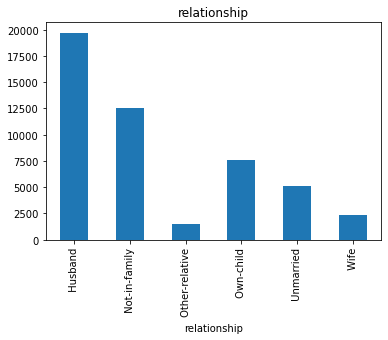

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


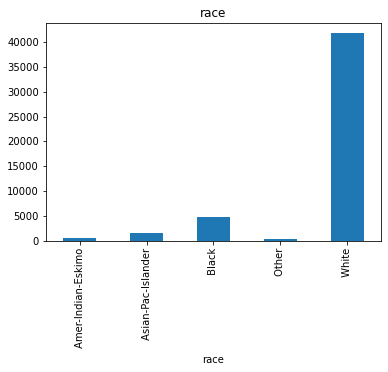

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


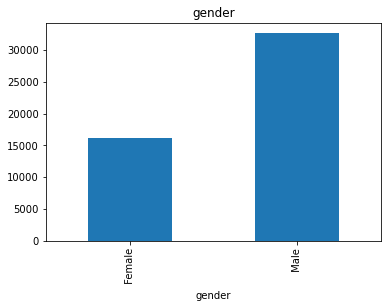

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


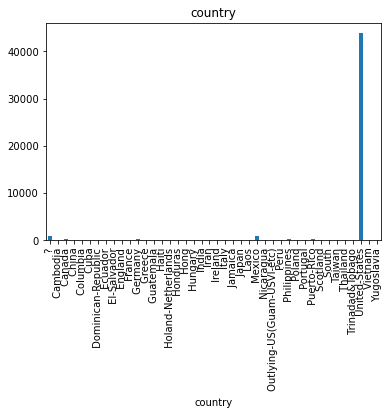

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [94]:
## categorical features
cat_feat = [feature for feature in master_df.columns if master_df[feature].dtypes=='O']

## Performing visualiation to see each category's weightage
for feature in cat_feat:
    master_df.groupby(feature)['target'].count().plot.bar()
    plt.title(feature)
    plt.show()
    print("Z"*120)

#### Categories are not at all evenly distributed

In [95]:
## Above visualizations show, features like workclass,country,occupation have certain values as "?"
master_df = master_df.replace(" ?",'Missing')

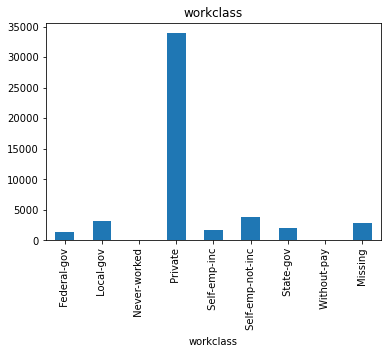

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


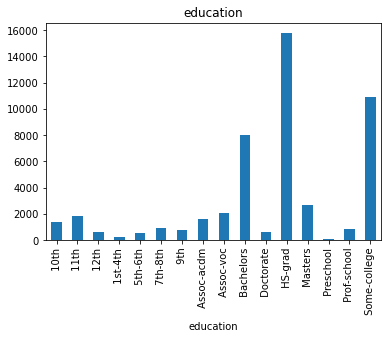

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


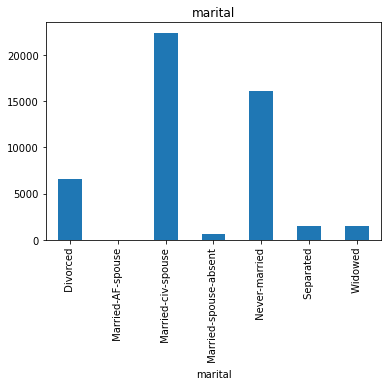

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


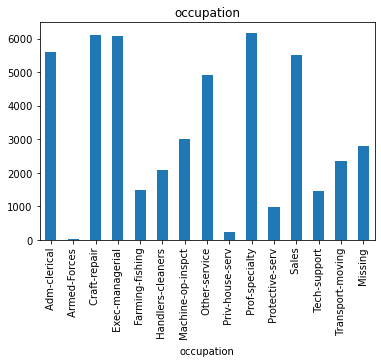

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


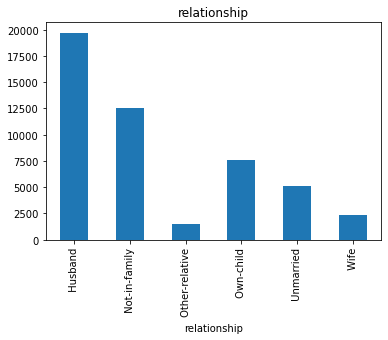

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


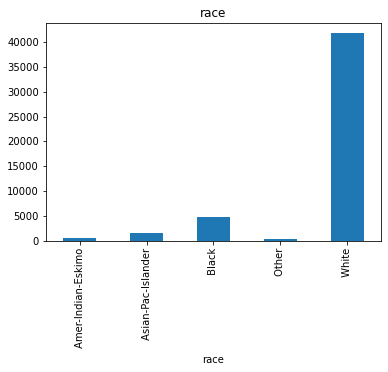

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


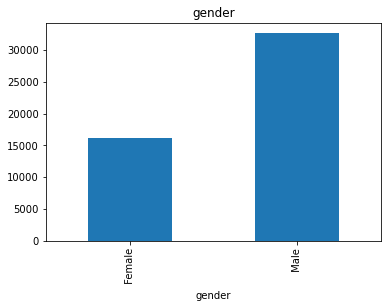

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


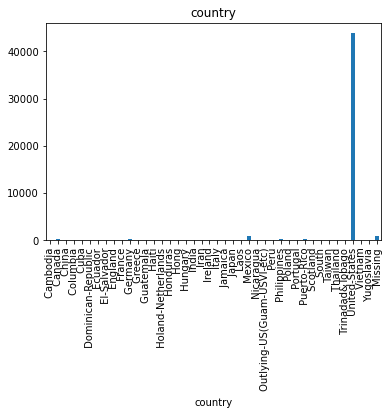

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [96]:
## Repeating above visualization
for feature in cat_feat:
    master_df.groupby(feature)['target'].count().plot.bar()
    plt.title(feature)
    plt.show()
    print("Z"*120)

In [97]:
## Finding the cardinal levels in each categorical feature
for feature in cat_feat:
    print(feature, "has {} different categories".format(len(master_df[feature].unique())))

workclass has 9 different categories
education has 16 different categories
marital has 7 different categories
occupation has 15 different categories
relationship has 6 different categories
race has 5 different categories
gender has 2 different categories
country has 42 different categories


#### As is visible, categorical variables have a lot of levels which aren't equally distributed, hence marking levels that have less than 5% overall presence as 'rare_val'

In [98]:
for feature in cat_feat:
    temp = master_df.groupby(feature)['target'].count()/master_df.shape[0]
    temp_df = temp[temp<0.05].index
    master_df[feature] = np.where(master_df[feature].isin(temp_df),'rare_val',master_df[feature])

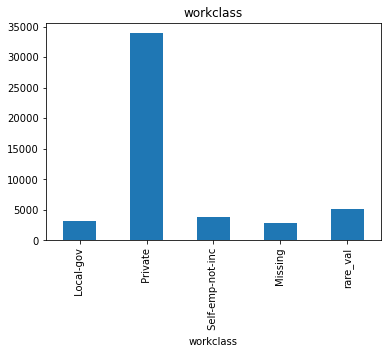

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


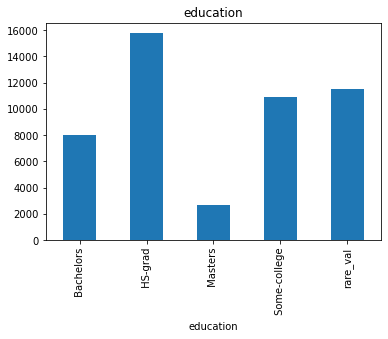

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


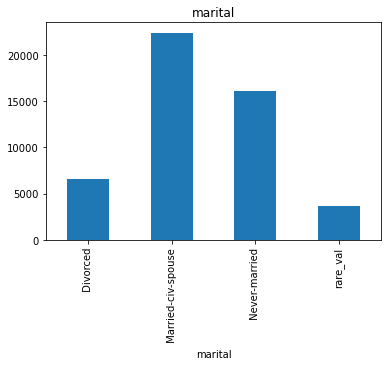

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


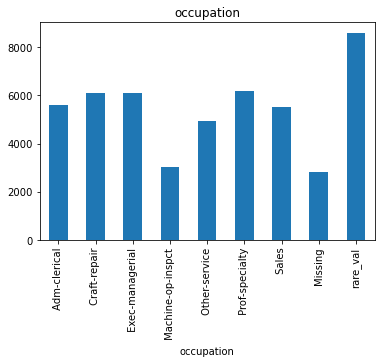

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


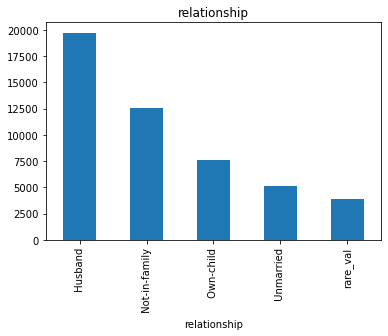

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


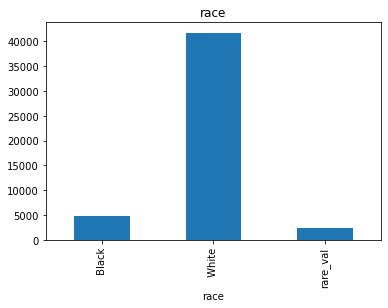

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


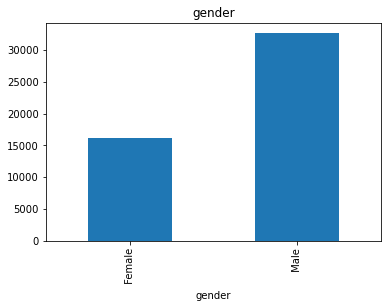

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


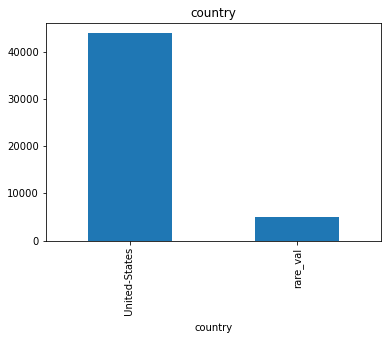

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [99]:
## Performing above visualization again, just to see the change
for feature in cat_feat:
    master_df.groupby(feature)['target'].count().plot.bar()
    plt.title(feature)
    plt.show()
    print("Z"*120)

In [100]:
## Numerical Features
num_feat = [feature for feature in master_df.columns if feature not in cat_feat and feature!='target']
num_feat

['age', 'fnl_wgt', 'edu_num', 'cap_gain', 'cap_loss', 'hours/week']

In [101]:
## Creating dummy dataframe for cat_feat
dum_df = pd.get_dummies(master_df[cat_feat], drop_first=True)
dum_df.head()

,workclass_ Private,workclass_ Self-emp-not-inc,workclass_Missing,workclass_rare_val,education_ HS-grad,education_ Masters,education_ Some-college,education_rare_val,marital_ Married-civ-spouse,marital_ Never-married,marital_rare_val,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_Missing,occupation_rare_val,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_rare_val,race_ White,race_rare_val,gender_ Male,country_rare_val
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [102]:
## Merging dummy dataframe
master_df = pd.concat([master_df,dum_df],1)

## Dropping cat_feat columns 
master_df.drop(cat_feat,1,inplace=True)

master_df.head()

,age,fnl_wgt,edu_num,cap_gain,cap_loss,hours/week,target,workclass_ Private,workclass_ Self-emp-not-inc,workclass_Missing,workclass_rare_val,education_ HS-grad,education_ Masters,education_ Some-college,education_rare_val,marital_ Married-civ-spouse,marital_ Never-married,marital_rare_val,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_Missing,occupation_rare_val,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_rare_val,race_ White,race_rare_val,gender_ Male,country_rare_val
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,50,83311,13,0,0,13,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,38,215646,9,0,0,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [103]:
master_df.shape

(48842, 34)

c:\users\prerak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


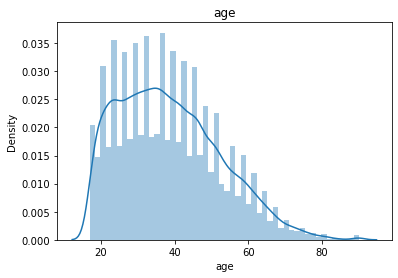

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


c:\users\prerak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


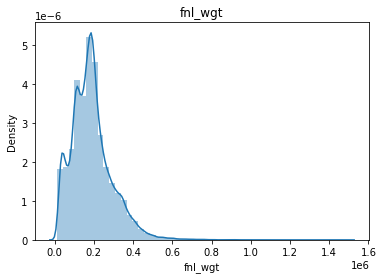

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


c:\users\prerak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


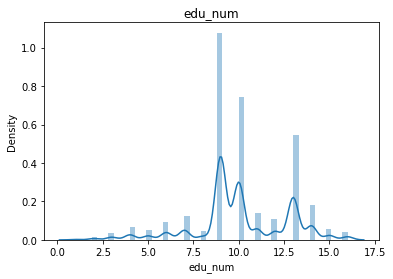

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


c:\users\prerak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


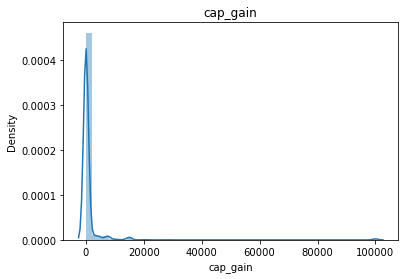

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


c:\users\prerak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


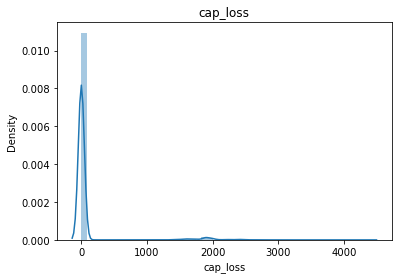

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


c:\users\prerak\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


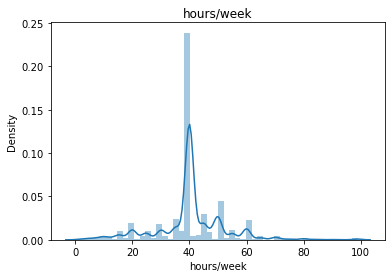

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [104]:
## Distribution of num_feat
for feature in num_feat:
    sns.distplot(master_df[feature])
    plt.title(feature)
    plt.show()
    print("X"*120)

In [107]:
## X y split
X = master_df.drop('target',1)
y = master_df['target']

## Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [108]:
X_train.shape,X_test.shape

((34189, 33), (14653, 33))

In [111]:
## Helper Functions
def plt_tree(dt):
    plt.figure(figsize=(60,30))
    plot_tree(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['Below 50K','Above 50K'])
    plt.show()
    
def evaluate_model(model,x,y):
    print(metrics.classification_report(y,model.predict(x)))
    print("Z"*120)
    print(metrics.plot_roc_curve(estimator=model, X=x, y=y, drop_intermediate=False))

### Decision Tree with arbitrary hyper-params

In [109]:
dt = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=50)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=100)

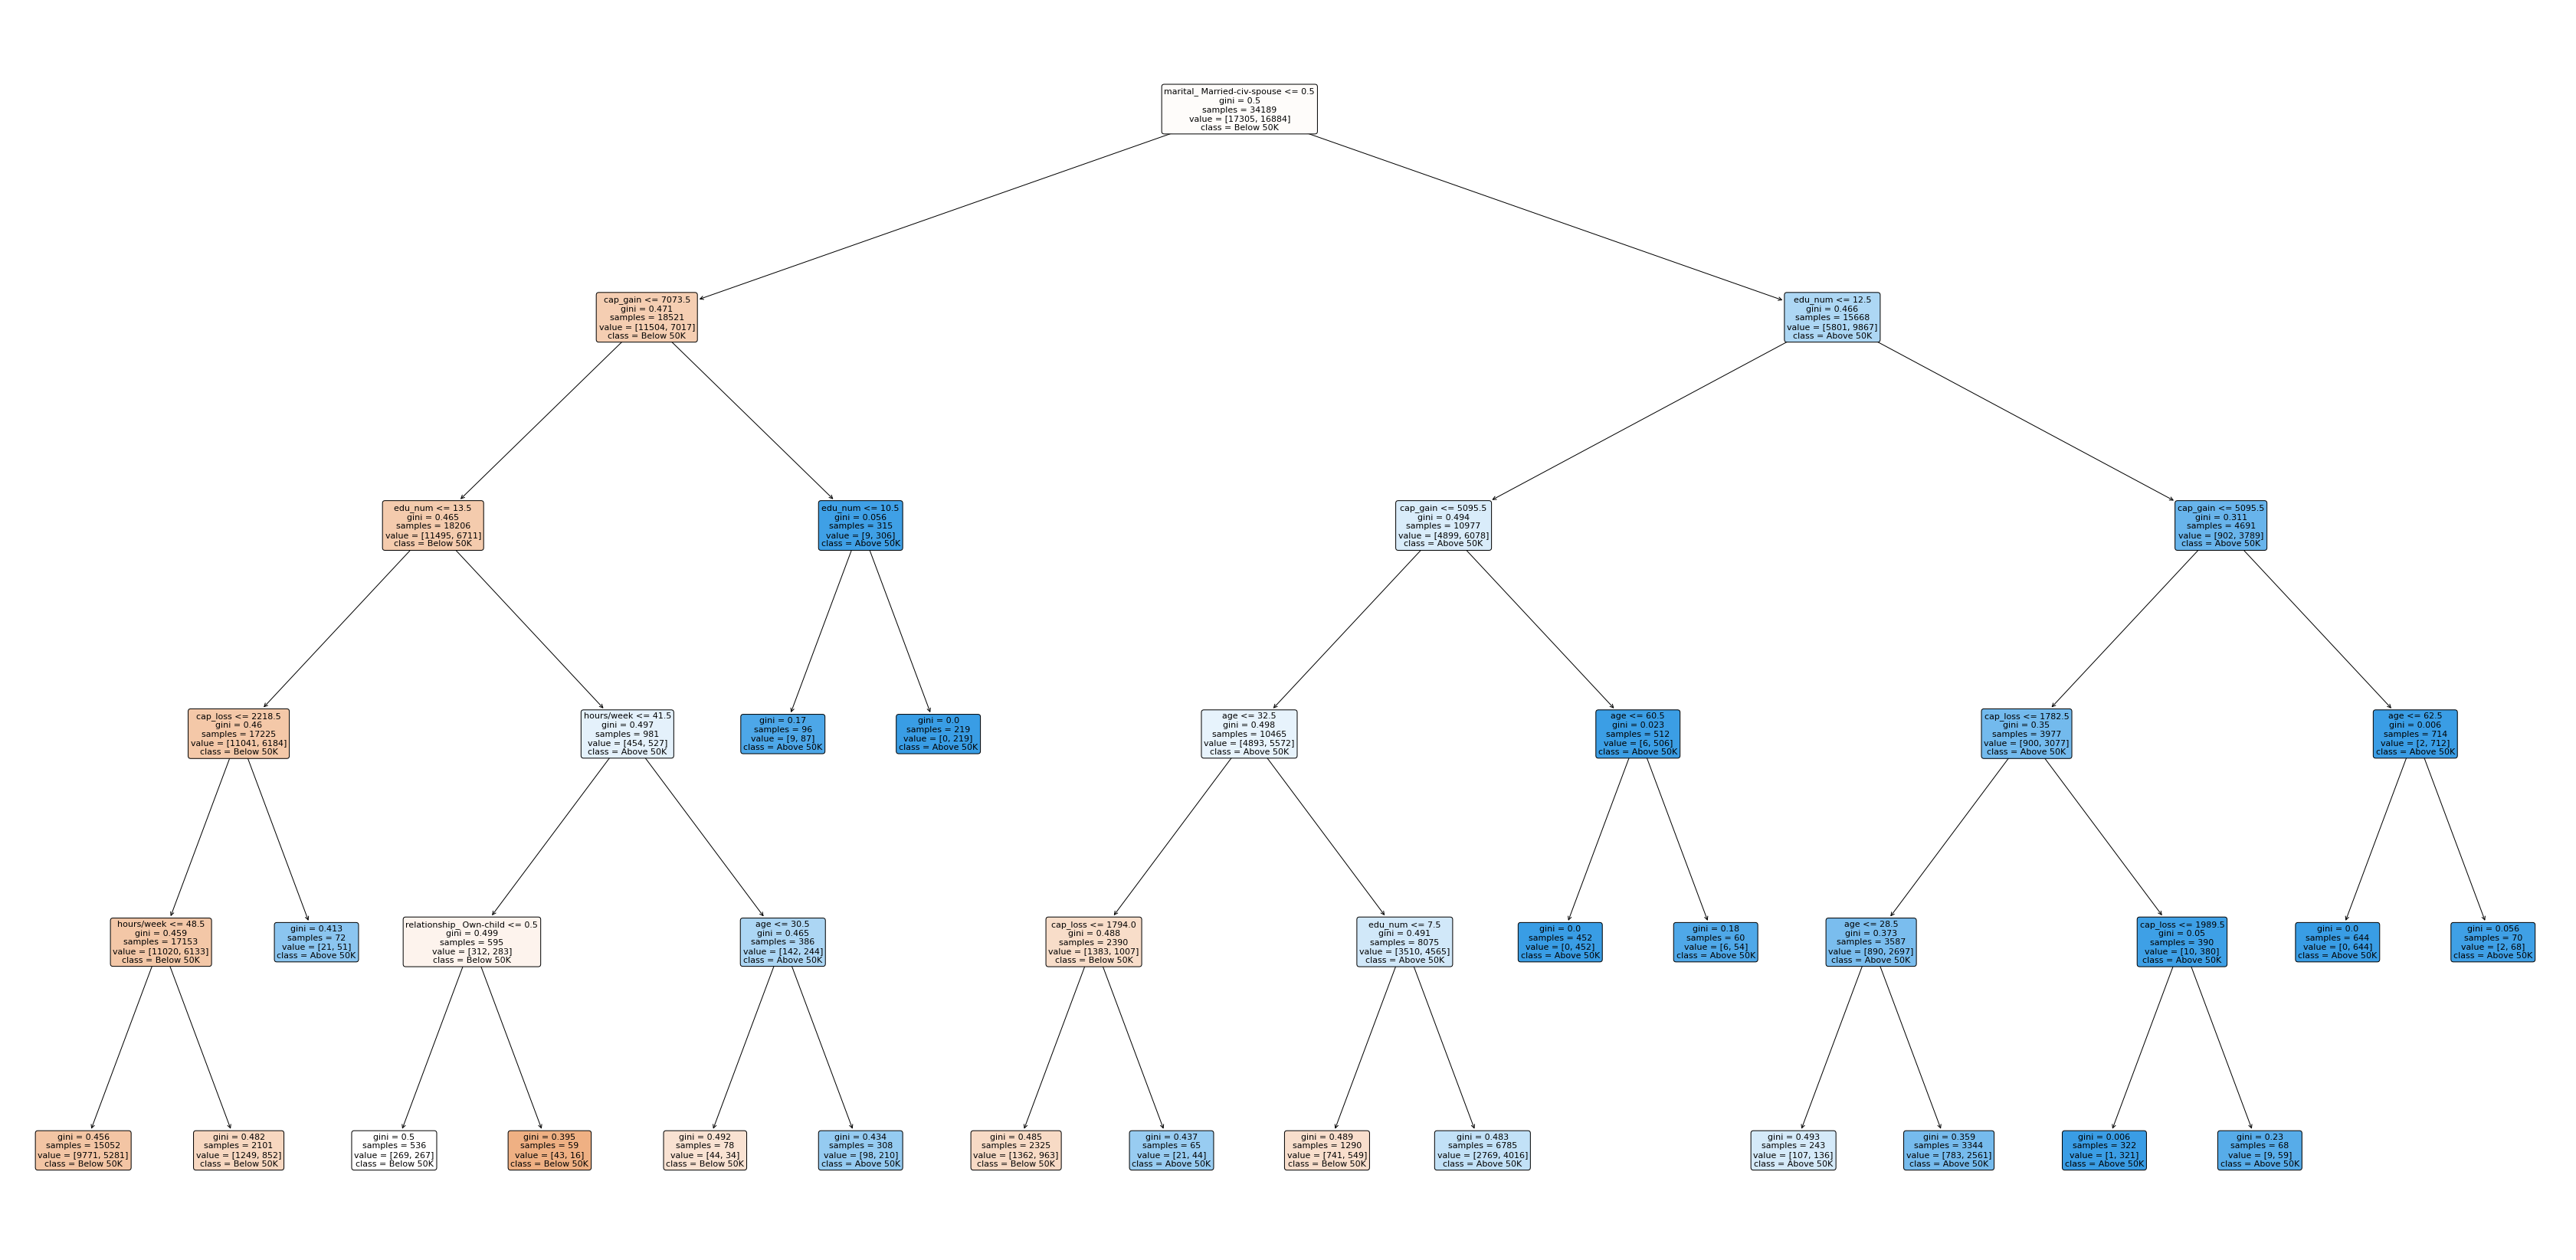

In [112]:
plt_tree(dt)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     17305
           1       0.70      0.53      0.60     16884

    accuracy                           0.66     34189
   macro avg       0.66      0.65      0.65     34189
weighted avg       0.66      0.66      0.65     34189

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


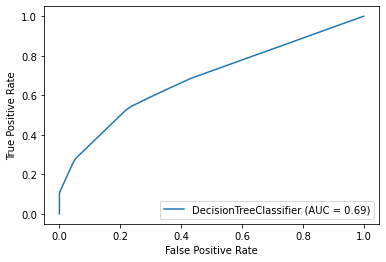

In [113]:
## Train set
evaluate_model(dt,X_train,y_train)

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      7415
           1       0.69      0.53      0.60      7238

    accuracy                           0.65     14653
   macro avg       0.66      0.65      0.65     14653
weighted avg       0.66      0.65      0.65     14653

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


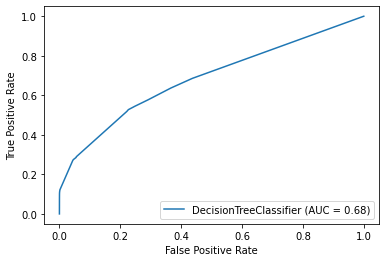

In [114]:
## Test Set
evaluate_model(dt,X_test,y_test)

## This model is a low bias but a high variance model, subpar accuracy but can replicate similar results on different dataframes

### Random Forest with Cross-Validation

In [115]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [116]:
params = {"n_estimators":[10,30,50,100,200],'max_depth':[2,3,4,5,6],'min_samples_leaf':[30,50,125,200]}

In [117]:
grid = GridSearchCV(estimator=rf, param_grid=params, cv=6, scoring='accuracy', verbose=1, n_jobs=-1)

In [118]:
%%time
grid.fit(X_train,y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.3min finished


Wall time: 7min 19s


GridSearchCV(cv=6,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [30, 50, 125, 200],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [119]:
grid.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=30, n_estimators=50,
                       n_jobs=-1, random_state=100)

In [120]:
rf_best = RandomForestClassifier(max_depth=6, min_samples_leaf=30, n_estimators=50,
                       n_jobs=-1, oob_score=True ,random_state=100)
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=30, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=100)

              precision    recall  f1-score   support

           0       0.64      0.72      0.68     17305
           1       0.67      0.59      0.63     16884

    accuracy                           0.65     34189
   macro avg       0.66      0.65      0.65     34189
weighted avg       0.66      0.65      0.65     34189

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


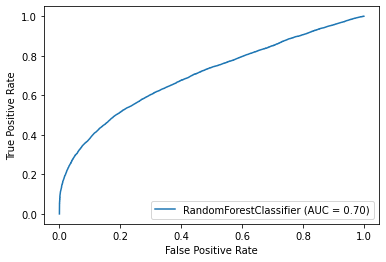

In [121]:
## train set
evaluate_model(rf_best,X_train,y_train)

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      7415
           1       0.67      0.59      0.62      7238

    accuracy                           0.65     14653
   macro avg       0.65      0.65      0.65     14653
weighted avg       0.65      0.65      0.65     14653

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


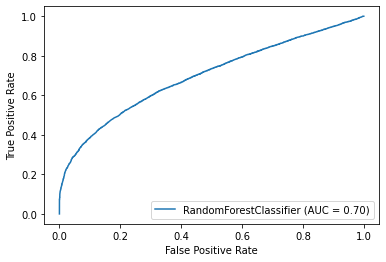

In [122]:
## test set
evaluate_model(rf_best, X_test, y_test)

In [123]:
##Confusion Matrix for train set
print(metrics.confusion_matrix(y_train,rf_best.predict(X_train)))
print("-"*120)

##Confusion MAtrix for test set
print(metrics.confusion_matrix(y_test,rf_best.predict(X_test)))

[[12439  4866]
 [ 6961  9923]]
------------------------------------------------------------------------------------------------------------------------
[[5282 2133]
 [2998 4240]]


In [125]:
## Feature Prominence
pd.DataFrame({"Feature":X_train.columns,"Importance":rf_best.feature_importances_}).sort_values("Importance", ascending=False)

,Feature,Importance
14,marital_ Married-civ-spouse,0.215995
3,cap_gain,0.165488
2,edu_num,0.145142
0,age,0.096374
15,marital_ Never-married,0.080446
18,occupation_ Exec-managerial,0.039668
5,hours/week,0.037101
25,relationship_ Not-in-family,0.036255
31,gender_ Male,0.031368
21,occupation_ Prof-specialty,0.023303


In [126]:
## oob score
rf_best.oob_score_

0.6496241481178157

## This model also has low bias, but a respectable variance.. OOB score, test scores and train scores are an ample evidence of that

### Old-Fashioned Logistic Regression Model

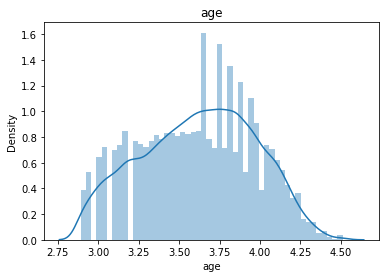

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


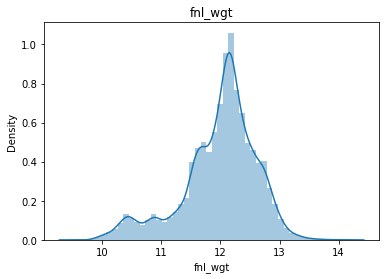

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


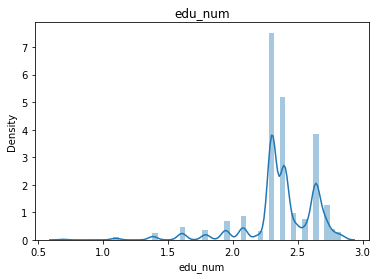

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


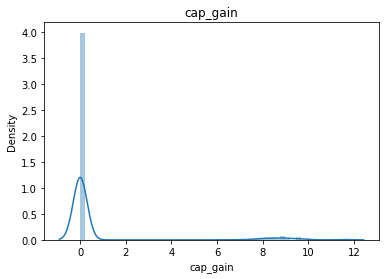

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


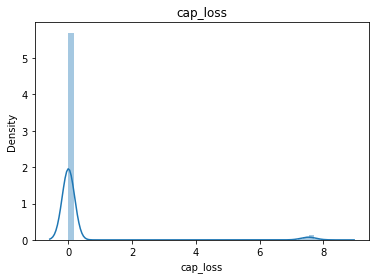

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


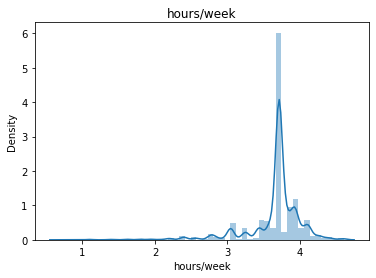

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [128]:
## Log Transformation for scaling`
X_train[num_feat] = np.log1p(X_train[num_feat])


## Distribution of num_feat
for feature in num_feat:
    sns.distplot(X_train[feature])
    plt.title(feature)
    plt.show()
    print("X"*120)

In [195]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.64      0.66      0.65     17305
           1       0.64      0.62      0.63     16884

    accuracy                           0.64     34189
   macro avg       0.64      0.64      0.64     34189
weighted avg       0.64      0.64      0.64     34189

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7415
           1       0.49      1.00      0.66      7238

    accuracy                           0.49     14653
   macro avg       0.25      0.50      0.33     14653
weighted avg       0.24      0.49      0.33     14653

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ

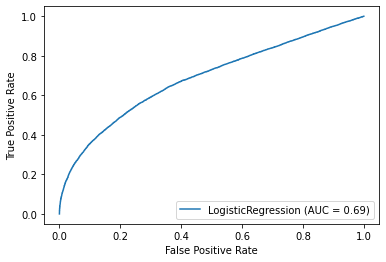

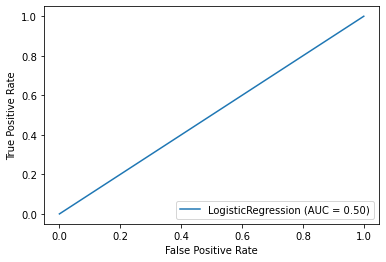

In [196]:
## Train
evaluate_model(lr,X_train,y_train)

print("X"*120)

# Test
evaluate_model(lr,X_test,y_test)

## The above Logistic Regression model has low bias and low variance, hence the worst model yet, still using a Stacking Regressor to see if it makes some difference

In [181]:
est = [('dt',DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=100)),
      ('rf',RandomForestClassifier(max_depth=6, min_samples_leaf=30, n_estimators=50,n_jobs=-1, random_state=100)),
      ('lr',LogisticRegression())]

In [182]:
st = StackingClassifier(estimators=est, final_estimator=LogisticRegression())
st.fit(X_train,y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=50,
                                                       random_state=100)),
                               ('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_leaf=30,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       random_state=100)),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

              precision    recall  f1-score   support

           0       0.64      0.75      0.69     17305
           1       0.69      0.56      0.62     16884

    accuracy                           0.66     34189
   macro avg       0.66      0.66      0.65     34189
weighted avg       0.66      0.66      0.65     34189

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


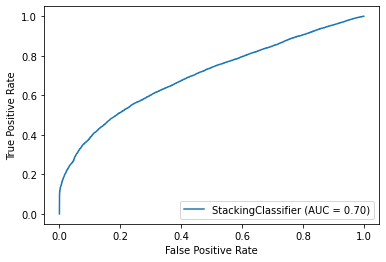

In [183]:
## Train
evaluate_model(st,X_train,y_train)

              precision    recall  f1-score   support

           0       0.70      0.01      0.01      7415
           1       0.50      1.00      0.66      7238

    accuracy                           0.50     14653
   macro avg       0.60      0.50      0.34     14653
weighted avg       0.60      0.50      0.33     14653

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


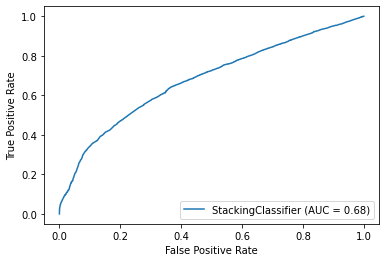

In [184]:
## Test
evaluate_model(st,X_test,y_test)

In [194]:
## Weightage of models in order
st.final_estimator_.coef_

array([[ 1.95876161,  3.71433059, -0.01509534]])

### The stacking model also has low variance, hence the random forest and decision tree were the better models